# Exercise 04.0 - Neural Networks for Regression

## Part I - Exploratory Data Analysis


The main objective of the tutorial for this week is to to build a model for predictiong housing prices in California using the California census data.
Our model should learn from this data and be able to predict the median housing price in any district, given all the other attributes.
This notebook is the first part of the tutorial, where we apply some statistic and visualization techniques in order to understand the data.



## Learning Objectives

+ Larn how to perform Exploratory Data Analysis in order to get insight in the dataset.

#### Dataset
In this tutorial we will uses the `California Housing Prices` dataset from the StatLib repository. This dataset was derived from the 1990 U.S. census, using one *row per census block group*. A **block group** is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).
Although it is not very recent it has many qualities for learning. 
The original dataset appeared in R. Kelley Pace and Ronald Barry, “Sparse Spatial Autoregressions,” Statistics
& Probability Letters 33, no. 3 (1997): 291–297.
The dataset comes in tabular form, comprising more than 20600 records with 8 columns that represent attributes (features) such as the population, median income, median housing price, and so on for each *block group* in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). Here they will be called “districts”  for the sake of brevity.
for short.
[ California Housing dataset¶](https://scikit-learn.org/stable/datasets/index.html)


- MedInc median income in block

+ HouseAge median house age in block

+ AveRooms average number of rooms

+ AveBedrms average number of bedrooms

+ Population block population

+ AveOccup average house occupancy

+ Latitude house block latitude

+ Longitude house block longitude

This dataset was obtained from the StatLib repository. http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.



It can be downloaded/loaded using the `sklearn.datasets.fetch_california_housing` function.

In [1]:
import sys
import sklearn
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
 if not os.path.exists('./datasets'): # creating a path for dataset if not existing
    os.mkdir('./datasets')

We start loading the dataset using the built-in [datasets module from sklearn](https://scikit-learn.org/stable/datasets/index.html) using the `fetch_california_housing` function.

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
X_full, y_full = fetch_california_housing(data_home = r'./datasets', return_X_y=True) 

In [5]:
# the dataset is loaded in two numpy arrays for data and target; Let us check this::
print(type(X_full))
print(X_full.shape)
print(type(y_full))
print(y_full.shape)

<class 'numpy.ndarray'>
(20640, 8)
<class 'numpy.ndarray'>
(20640,)


In [6]:
# As we can read in the documentation of the dataset object, the data includes the folowing attributes:

attributes = ['median_income', 'housing_median_age', 'aveRooms', 'aveBedrms', 'population', ' aveOccup','latitude','longitude']

In [7]:
pd.DataFrame(y_full).describe()

,0
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


#### Reading the data in a dataframe

To become familiar with the data we load the data in a pandas dataframe:

In [8]:
housing = pd.DataFrame(X_full, columns = attributes )

In [9]:
# appending the target column

housing['median_house_value'] = y_full

In [10]:
housing.head()

,median_income,housing_median_age,aveRooms,aveBedrms,population,aveOccup,latitude,longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Each row represents one district. There are 8 attributes : `median_income`, `housing_median_age`, `aveRooms`, `aveBedrms`, `population`, `aveOccup`, `latitude`,`longitude` and `median_house_value` which is also our target.
The `info()` method is useful to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   housing_median_age  20640 non-null  float64
 2   aveRooms            20640 non-null  float64
 3   aveBedrms           20640 non-null  float64
 4   population          20640 non-null  float64
 5    aveOccup           20640 non-null  float64
 6   latitude            20640 non-null  float64
 7   longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


+ There are 20,640 instances in the dataset, which means that it is a reduced-size dataset by Machine Learning standards, but it is still useful for learning purposes.
+ All attributes are `numerical`.
+ As you can observe, all fields include the same number of non-null values (equal to the number of records) which means that the dataset have been already cleaned for us.
+ This is not the case with real datasets, which most often include missing values, wrong values and require extensive data cleaning phase. 

In [12]:
housing.describe()

,median_income,housing_median_age,aveRooms,aveBedrms,population,aveOccup,latitude,longitude,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Another quick way to get a feel of the type of data you are dealing with is to *plot a histogram* for each numerical attribute.
+ A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
+ You can either plot this one attribute at a time, or you can call the `hist()` method on the whole dataset, and it will plot a histogram for each numerical attribute.

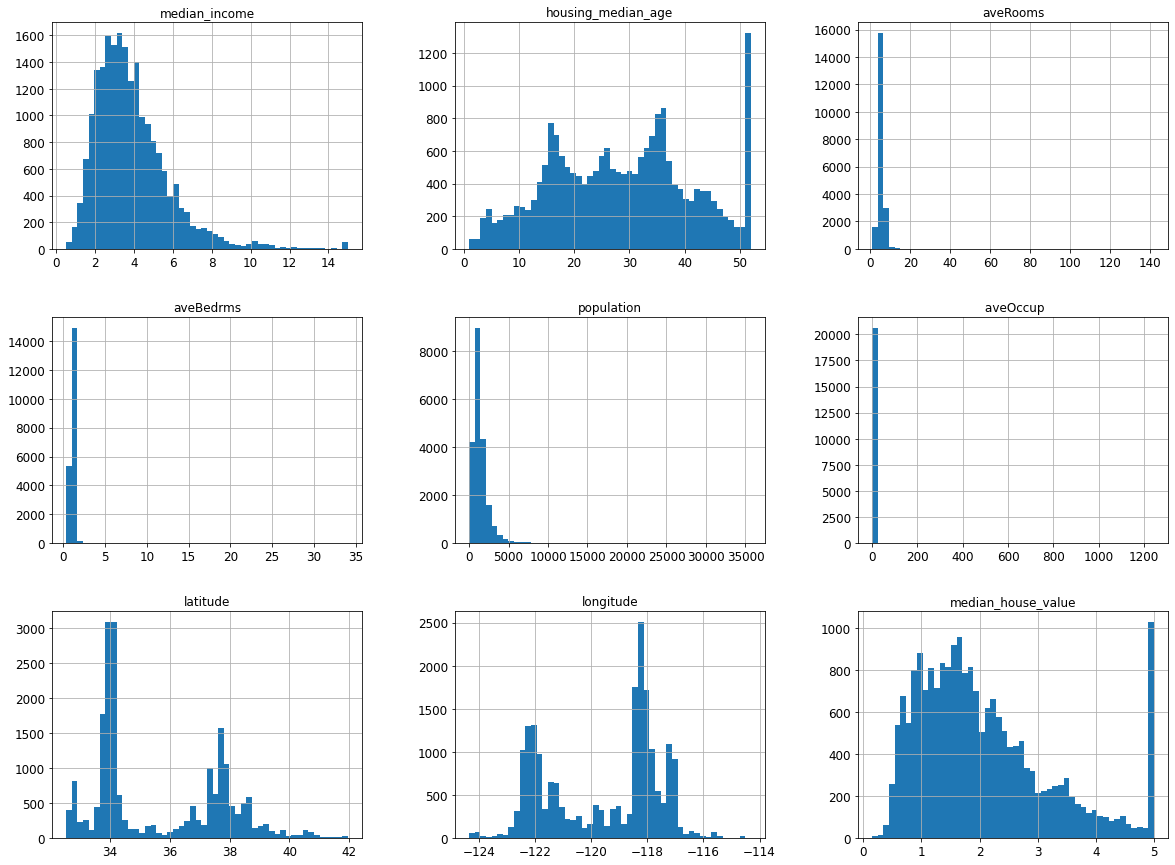

In [13]:
housing.hist(bins=50, figsize=(20,15));

#### OBSERVATIONS from histogram plots

1. The `median income` attribute does not look like it is expressed in US dollars (USD) units but in 100k. Also, from the dataset metadata we learn that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes. 
2. The `housing median age` and the `median house value` were also capped. The latter may be a serious problem since it is our `target attribute` (labels/ground truth). Our Deep Learning algorithm may learn that prices never go beyond that limit.
In a real setting we would  need to check with our client to see if this was a problem or not. If they would need precise predictions even beyond $500,000, then we have mainly two options:

+ a. Collect proper labels for the districts whose labels were capped.
+ b. Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).

3. These attributes have very *different scales* (order of magnitude). 
4. Finally, many histograms are *tail heavy*: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

### Discover and visualize the data to gain insights

Make sure you have put the test set aside and you are only exploring the training set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast. In our case, the set is quite small so you can just work directly on the full set. Let’s create a copy so you can play with it without harming the training set:

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
housing = train_set.copy()

Since there is geographical information (latitude and longitude), it is a good idea to  create a scatterplot of all districts to visualize the data:

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points:
The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

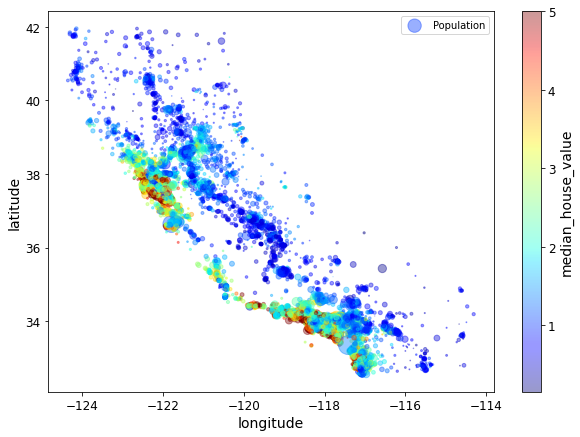

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="Population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend();

This image tells us that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density.

### Looking for Correlations

Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the `corr()` method:

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
aveRooms              0.158485
housing_median_age    0.103706
 aveOccup            -0.022030
population           -0.026032
longitude            -0.046349
aveBedrms            -0.051351
latitude             -0.142983
Name: median_house_value, dtype: float64

The **correlation coefficient** ranges from –1 to 1 (and only measures linear correlations).
+ When it is close to **1**, it means that there is a **strong positive correlation**; for example, the median house value tends to go up when the median income goes up.
+ When the coefficient is close to –1, it means that there is a **strong negative correlation**; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north).
+ Finally, coefficients close to zero mean that there is no linear correlation. Figure 2-14 shows various plots along with the correlation coefficient between their horizontal and vertical axes.

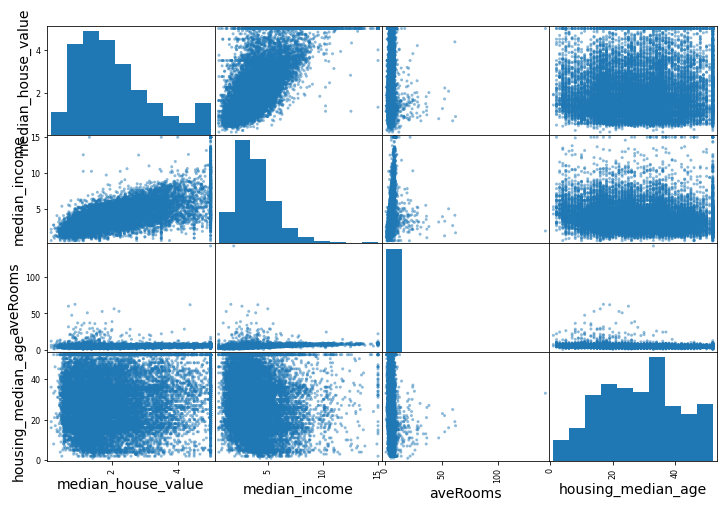

In [19]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "aveRooms",
              "housing_median_age"]
_ = scatter_matrix(housing[attributes], figsize=(12, 8))

The main diagonal (top left to bottom right)  Pandas displays a histogram of each attribute (an not the correlation of each variable against itself). </br>
The most promising attribute to predict the `median house value` is the `median income`, so let’s zoom in on their correlation scatterplot:

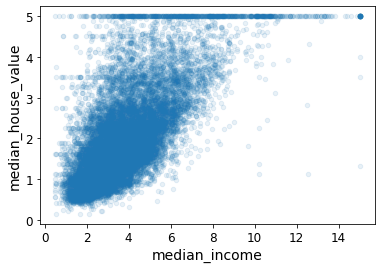

In [20]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1);

This plot reveals a few things:

+ the correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed.
+ the price cap that we noticed earlier is clearly visible as a horizontal line at 500,000 dollars .
+ this plot reveals other less obvious straight lines: a horizontal line around 450,000 dollars , another around 350,000 dollars  , perhaps one around 280,000 dollars , and a few more below that.

You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

In [24]:
# please remember to shut down the kernel before leaving the server